In [ ]:
import pandas as pd
Fake=pd.read_csv("/content/Fake.csv")
Real=pd.read_csv("/content/True.csv")

In [ ]:
#add label
Fake['label']=0
Real['label']=1

In [ ]:
#combine dataset
data=pd.concat([Fake,Real])

In [ ]:
data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [ ]:
#remove punctuations and lowercasetext
import string
import re
def clean_text(text):
  text=text.lower()
  text=re.sub(r'\[.*?\]','',text)
  text=re.sub(r'w\d\w*','',text)
  text=re.sub(r'[%s]'%re.escape(string.punctuation),'',text)
  return text
data['text']=data['text'].apply(clean_text)

In [ ]:
x=data['text']
y=data['label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
x_train_vectorizer=vectorizer.fit_transform(x_train)
x_test_vectorizer=vectorizer.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train_vectorizer,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test_vectorizer)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test,y_pred)
print("Accuracy Score:",accuracy_score)

Accuracy Score: 0.9860801781737194


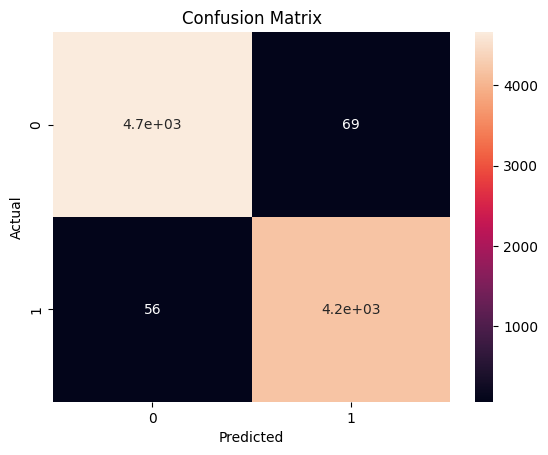

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.98      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test,y_pred))

In [ ]:
import pandas as pd
Fake=pd.read_csv("/content/Fake.csv")
Real=pd.read_csv("/content/True.csv")
#add label
Fake['label']=0
Real['label']=1
#combine dataset
data=pd.concat([Fake,Real])
#remove punctuations and lowercasetext
import string
import re
def clean_text(text):
  text=text.lower()
  text=re.sub(r'\[.*?\]','',text)
  text=re.sub(r'w\d\w*','',text)
  text=re.sub(r'[%s]'%re.escape(string.punctuation),'',text)
  return text
data['text']=data['text'].apply(clean_text)
x=data['text']
y=data['label']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)